# Parallel Node Execution
- Goal: Building Multi Agent workflows

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

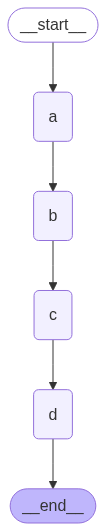

In [2]:
from IPython.display import Image, display
import operator
from typing import Annotated, Any
from pydantic import BaseModel, Field
from langgraph.graph import START, StateGraph, END


class State(BaseModel):
    state:list[str] = Field(description="The state of the graph")

class ReturnNodeValue:
    def __init__(self, node_secret:str):
        self._value = node_secret
    
    def __call__(self, state:State)->Any:
        print(f"Adding : {self._value} to {state.state}")
        return {"state":[self._value]}
    
# add nodes
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I am in a"))
builder.add_node("b", ReturnNodeValue("I am in b"))
builder.add_node("c", ReturnNodeValue("I am in c"))
builder.add_node("d", ReturnNodeValue("I am in d"))

# add edges
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

# display graph
display(Image(graph.get_graph().draw_mermaid_png()))



In [3]:
graph.invoke({"state":[]})

Adding : I am in a to []
Adding : I am in b to ['I am in a']
Adding : I am in c to ['I am in b']
Adding : I am in d to ['I am in c']


{'state': ['I am in d']}

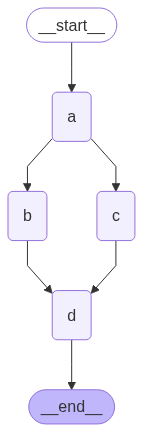

Adding : I am in a to []
Adding : I am in b to ['I am in a']
Adding : I am in c to ['I am in a']
Adding : I am in d to ['I am in a', 'I am in b', 'I am in c']


{'state': ['I am in a', 'I am in b', 'I am in c', 'I am in d']}

In [4]:
# now let's run b and c in parallel

class State(BaseModel):
    state:Annotated[list[str], operator.add] = Field(description="The state of the graph")

class ReturnNodeValue:
    def __init__(self, node_secret:str):
        self._value = node_secret
    
    def __call__(self, state:State)->Any:
        print(f"Adding : {self._value} to {state.state}")
        return {"state":[self._value]}
# add nodes
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I am in a"))
builder.add_node("b", ReturnNodeValue("I am in b"))
builder.add_node("c", ReturnNodeValue("I am in c"))
builder.add_node("d", ReturnNodeValue("I am in d"))

# add edges
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

# display graph
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"state":[]})

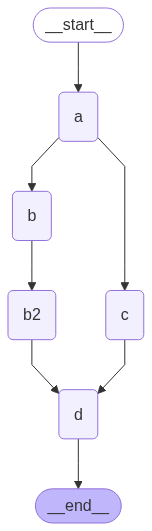

Adding : I am in a to []
Adding : I am in b to ['I am in a']
Adding : I am in c to ['I am in a']
Adding : I am in b2 to ['I am in a', 'I am in b', 'I am in c']
Adding : I am in d to ['I am in a', 'I am in b', 'I am in c', 'I am in b2']


{'state': ['I am in a', 'I am in b', 'I am in c', 'I am in b2', 'I am in d']}

In [5]:
# now let's run b and c in parallel

class State(BaseModel):
    state:Annotated[list[str], operator.add] = Field(description="The state of the graph")

class ReturnNodeValue:
    def __init__(self, node_secret:str):
        self._value = node_secret
    
    def __call__(self, state:State)->Any:
        print(f"Adding : {self._value} to {state.state}")
        return {"state":[self._value]}
# add nodes
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I am in a"))
builder.add_node("b", ReturnNodeValue("I am in b"))
builder.add_node("b2", ReturnNodeValue("I am in b2"))
builder.add_node("c", ReturnNodeValue("I am in c"))
builder.add_node("d", ReturnNodeValue("I am in d"))

# add edges
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

# display graph
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"state":[]})

# Setting the order of state updates
- It's deterministic
- But we can use customer reducers to customise this. e.g sorting state updates

In [6]:
def sorting_reducer(left, right):
    """ Combines and sorts the state updates
    """
    if not isinstance(left, list):
        left = [left]
    if not isinstance(right, list):
        right = [right]
    
    return sorted(left + right)

class State(BaseModel):
    state:Annotated[list[str], sorting_reducer] = Field(description="The state of the graph")    

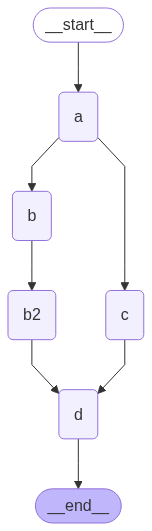

Adding : I am in a to []
Adding : I am in b to ['I am in a']
Adding : I am in c to ['I am in a']
Adding : I am in b2 to ['I am in a', 'I am in b', 'I am in c']
Adding : I am in d to ['I am in a', 'I am in b', 'I am in b2', 'I am in c']


{'state': ['I am in a', 'I am in b', 'I am in b2', 'I am in c', 'I am in d']}

In [7]:
class ReturnNodeValue:
    def __init__(self, node_secret:str):
        self._value = node_secret
    
    def __call__(self, state:State)->Any:
        print(f"Adding : {self._value} to {state.state}")
        return {"state":[self._value]}
# add nodes
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I am in a"))
builder.add_node("b", ReturnNodeValue("I am in b"))
builder.add_node("b2", ReturnNodeValue("I am in b2"))
builder.add_node("c", ReturnNodeValue("I am in c"))
builder.add_node("d", ReturnNodeValue("I am in d"))

# add edges
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

# display graph
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"state":[]})

# Working with LLMs

In [8]:
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-4o-mini", temperature = 0)

In [10]:
class State(BaseModel):
    question:str =Field("",description="Question asked by the user")
    answer: str = Field("",description="Answer generated by the LLMs")
    context: Annotated[list[str], operator.add]

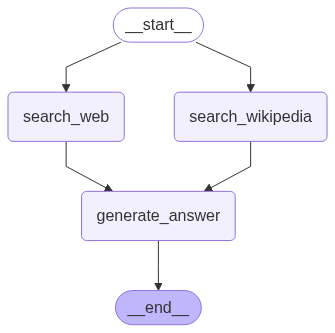

In [11]:
from langchain_core.documents import Document
from langchain_core.messages import HumanMessage, SystemMessage

from langchain_community.document_loaders import WikipediaLoader
from langchain_community.tools.tavily_search import TavilySearchResults

def search_web(state:State):
    """
    Get results from websearch

    Args:
        state (State): Current state of the graph
    """
    tavily_search = TavilySearchResults(max_results=3)
    search_docs = tavily_search.invoke(state.model_dump()['question'])
    
    # format results
    formatted_search_docs = "\n\n------\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )
    return {"context":[formatted_search_docs]}
    
def search_wikipedia(state:State):
    """
    Retrieve docs from wikipedia

    Args:
        state (State): Current state of the graph
    """
    search_docs = WikipediaLoader(query=state.model_dump()['question'],
                                  load_max_docs=2).load()
    
    # format
    format_search_docs = "\n\n----\n\n".join([
        f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
        for doc in search_docs
    ])
    
    return {"context": [format_search_docs]}

def generate_answer(state:State):
    """
    Node to answer a question

    Args:
        state (State): Current state of graph
    """
    
    state_dict = state.model_dump()
    context = state_dict['context']
    question = state_dict['question']
    
    # template 
    answer_template = """ Answer the quesiton {question} using the context: {context}"""
    answer_instructions = answer_template.format(question = question,
                                                 context = context)
    
    # answer
    answer = llm.invoke([SystemMessage(content = answer_instructions)] + [HumanMessage(content=f"Answer the question.")])
    
    # append answer to the state
    return {"answer": answer}


# build graph
workflow = StateGraph(State)
workflow.add_node("search_web", search_web)
workflow.add_node("search_wikipedia", search_wikipedia)
workflow.add_node("generate_answer", generate_answer)

workflow.add_edge(START, "search_wikipedia")
workflow.add_edge(START, "search_web")
workflow.add_edge("search_web", "generate_answer")
workflow.add_edge("search_wikipedia", "generate_answer")
workflow.add_edge("generate_answer", END)

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
result = graph.invoke({"question": "What is the expected earnings of apple in August 2025?"})
result['answer'].content

/var/folders/15/xbwr_x_d51sf0lj4mptglw6h0000gn/T/ipykernel_45830/1435424596.py:14: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(max_results=3)


'The expected earnings of Apple (AAPL) in August 2025 are projected to have an average price of $235.02, with a minimum price of $227.86 and a maximum price of $242.49. This indicates a potential return on investment of 5.73%.'

# Subgraphs
- Can have a graph as a node to the parent graph
- Toy example: Logger
    - One subgraph summarises logs
    - Other one finds failure modes
    - Communication is done with over-lapping keys
    - subgraphs can access docs from parent
    - parent can access summary/failure report from subgraphs

## Parent Graph

In [25]:
# log class
from operator import add
from typing import Annotated, List, Optional, Dict
from pydantic import BaseModel, Field

class Log(BaseModel):
    id: str = Field(description="The id of the log")
    question: str = Field(description="The question that was asked")
    docs:Optional[List[str]] = Field(None,description="The docs uploaded by the user")
    answer: str = Field(description="The answer to the question")
    grade: Optional[int] = Field(None,description="The grade of the answer")
    grader: Optional[str] = Field("", description="The grader who graded the answer")
    feedback: Optional[str] = Field('',description="The feedback on the answer")

## Subgraphs
- Failure Summary subgraph
- Question summary subgraph

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Failure State (Input Class)
class FailureAnalysisState(BaseModel):
    cleaned_logs:List[Log] = Field([],description="The cleaned logs")
    failures: List[Log] = Field([],description="The failures in the logs")
    fa_summary: str = Field('',description="The summary of the failure analysis")
    processed_logs: List[str] = Field([],description="Processed Logs")
    
# Failure State (Output Class)
class FailureAnalysisOutputState(BaseModel):
    fa_summary: str = Field('',description="The summary of the failure analysis")
    processed_logs: List[str] = Field([],description="Processed Logs")

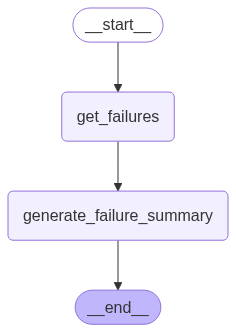

In [27]:
def get_failures(state):
    """ Gets logs that contain failures"""
    cleaned_logs = state.model_dump()['cleaned_logs']
    failures = [log for log in cleaned_logs if "grade" in log]
    return {"failures": failures}

def generate_failure_summary(state):
    """ Generates a summary of the failures"""
    failures = state.model_dump()['failures']
    fa_summary = "Poor retrieval of ChromaDB documents"
    return {"fa_summary": fa_summary, "processed_logs": [f"faliure-analysis-on-log-{failure['id']}" for failure in failures]}

# build graph
fa_builder = StateGraph(input_schema=FailureAnalysisState, output_schema=FailureAnalysisOutputState, state_schema=FailureAnalysisState)
fa_builder.add_node("get_failures", get_failures)
fa_builder.add_node("generate_failure_summary", generate_failure_summary)
fa_builder.add_edge(START, "get_failures")
fa_builder.add_edge("get_failures", "generate_failure_summary")
fa_builder.add_edge("generate_failure_summary", END)

# compile graph
graph = fa_builder.compile()

# display graph
display(Image(graph.get_graph().draw_mermaid_png()))


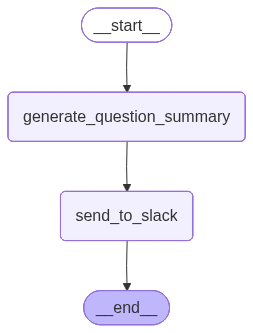

In [34]:
class QuestionSummarisationState(BaseModel):
    cleaned_logs: List[Log] = Field([],description="List of cleaned logs")
    qs_summary: str = Field('',description="Summary of the question")
    report: str = Field('',description="Summary report of the question")
    processed_logs: List[str] = Field([],description="Processed logs")
    

class QuestionSummarisationOutputState(BaseModel):
    report: str = Field('',description="Summary report of the question")
    processed_logs: List[str] = Field([],description="Processed logs")

def generate_question_summary(state):
    """ Generates a summary of the question"""
    cleaned_logs = state.model_dump()['cleaned_logs']
    summary = "Question focused on usage of ChatOllama and Chroma vector store"
    return {"qs_summary": summary, "processed_logs": [f"question-summary-on-log-{log['id']}" for log in cleaned_logs]}

def send_to_slack(state):
    qs_summary = state.model_dump()['qs_summary']
    report = "sample report to slack"
    return {"report":report}

# build graph
qs_builder = StateGraph(input_schema=QuestionSummarisationState, output_schema=QuestionSummarisationOutputState, state_schema=QuestionSummarisationState)
qs_builder.add_node("generate_question_summary", generate_question_summary)
qs_builder.add_node("send_to_slack", send_to_slack)
qs_builder.add_edge(START, "generate_question_summary")
qs_builder.add_edge("generate_question_summary", "send_to_slack")
qs_builder.add_edge("send_to_slack", END)

# compile graph
graph = qs_builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

# Adding subgraphs to parent graph
- Parent graph with a GRaphEntry state
- Node for Question summarisation
- Node for Failure Analysis

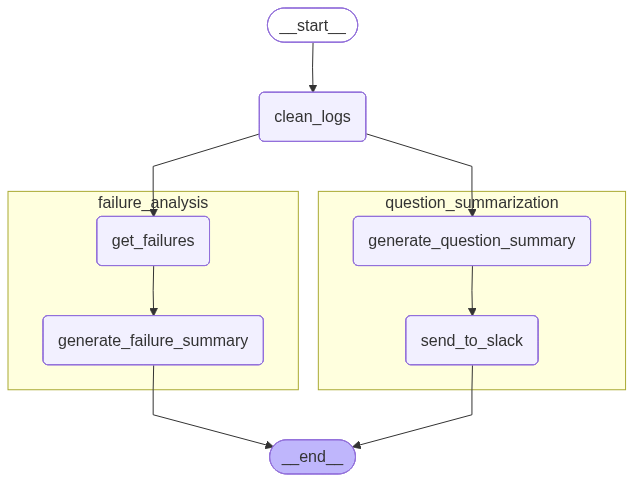

In [35]:
from typing import List
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END

class EntryGraphState(BaseModel):
    raw_logs:List[Log] = Field(description="List of raw logs")
    cleaned_logs: List[Log] = Field([],description="List of cleaned logs")
    fa_summary: str = Field("",description="Summary of the failure analysis")
    report: str = Field('',description="Report of the question")
    processed_logs: Annotated[List[Log], operator.add] = Field([],description="List of processed logs") # accessed by both subgraphs so need reducer
    
def clean_logs(state):
    raw_logs = state.model_dump()['raw_logs']
    cleaned_logs = raw_logs
    return {"cleaned_logs": cleaned_logs}


# build graph
entry_builder = StateGraph(EntryGraphState)
entry_builder.add_node("clean_logs", clean_logs)
entry_builder.add_node("question_summarization", qs_builder.compile())
entry_builder.add_node("failure_analysis", fa_builder.compile())
entry_builder.add_edge(START, "clean_logs")
entry_builder.add_edge("clean_logs", "question_summarization")
entry_builder.add_edge("clean_logs", "failure_analysis")
entry_builder.add_edge("failure_analysis", END)
entry_builder.add_edge("question_summarization", END)


# compile graph
graph = entry_builder.compile()

# display graph
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [36]:
question_answer = Log(
    id = "1",
    question = "How can I import ChatOllama?",
    answer = "To import ChatOllama, you can use the following command: 'from langchain_community.chat_models import ChatOllama'",
)

question_answer_feedback = Log(
    id = "2",
    question = "How can I use Chroma vector store?",
    answer = "To use Chroma, dedine: rag_chain = create_retrieval_rag_chain(llm, vectorstore)",
    grade=0,
    grader = "Document Relevance Recall",
    feedback = "The retrieved documents discuss vector stores in general but not Chroma specifically"
)

raw_logs = [question_answer, question_answer_feedback]
graph.invoke({'raw_logs': raw_logs})

ValidationError: 1 validation error for FailureAnalysisState
failures
  Field required [type=missing, input_value={'cleaned_logs': [Log(id=...', 'processed_logs': []}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing